<a href="https://colab.research.google.com/github/truongtuan2508/CS114.M11.KHCL/blob/main/Assignments/CS114_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS114.M11.KHCL


**Thành viên nhóm:** 

Trương Minh Sơn - 19522143                                     
Trương Văn Tuấn - 19522486                                           
Nguyễn Đức Toàn - 18521506

##Import library


In [2]:
import numpy as np
import pandas as pd
from sklearn import  linear_model
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##Get data train and test:


In [ ]:
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

In [55]:
headers = ["Size", "Time"]
data_2 = pd.read_csv('data2.txt', names=headers)
data_3 = pd.read_csv('data3.txt', names=headers)
data_4 = pd.read_csv('data4.txt', names=headers)

In [56]:
data_2 = data_2[data_2['Size'].values > 0.4*1e7]

In [57]:
# data2.txt
x_2 = np.array(data_2['Size']).reshape(-1, 1)
y_2 = np.array(data_2['Time'])
 
# data3.txt
x_3 = np.array(data_3['Size']).reshape(-1, 1)
y_3 = np.array(data_3['Time'])
 
# data4.txt
x_4 = np.array(data_4['Size']).reshape(-1, 1)
y_4 = np.array(data_4['Time'])

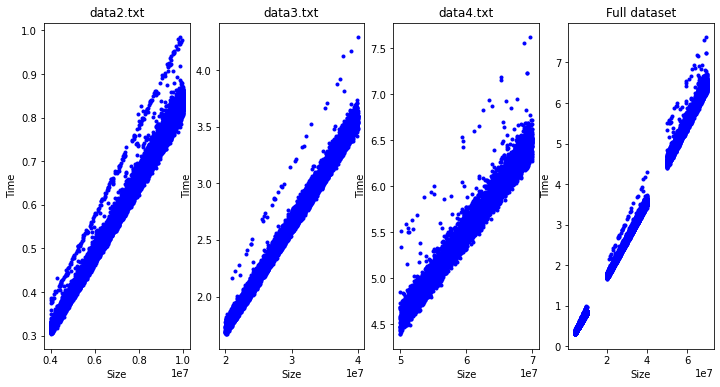

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# data2.txt
plt.subplot(1, 4, 1)
plt.plot(x_2, y_2, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data2.txt')

# data3.txt
plt.subplot(1, 4, 2)
plt.plot(x_3, y_3, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data3.txt')

# data4.txt
plt.subplot(1, 4, 3)
plt.plot(x_4, y_4, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('data4.txt')

# Full Dataset
plt.subplot(1, 4, 4)
plt.plot(x_2, y_2, 'b.')
plt.plot(x_3, y_3, 'b.')
plt.plot(x_4, y_4, 'b.')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Full dataset')
plt.show()

In [64]:
data_2.shape, data_3.shape, data_4.shape

((42646, 2), (10590, 2), (6023, 2))

##Xây dựng mô hình Linear Regression

In [65]:
# Thêm thư viện cần thiết
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Hàm in kết quả
def printResult(y, y_pre):
  data_mse = mean_squared_error(y, y_pre)
  data_mae = mean_absolute_error(y, y_pre)
  print("Mean squared error: ", data_mse)
  print("Mean absolute error: ", data_mae)
  

# Hàm biểu diễn kết quả
def showResult(x, y, y_pre, title):
  plt.figure(figsize=(5, 5))
  plt.plot(x, y, 'b.')
  plt.plot(x, y_pre, 'r-')
  plt.xlabel('Size')
  plt.ylabel('Time')
  plt.title(title)
  plt.show

###1.$x$

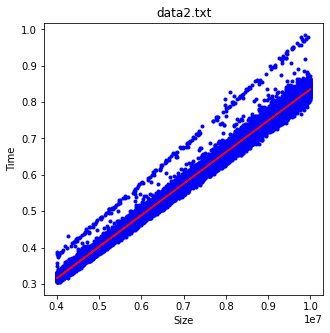

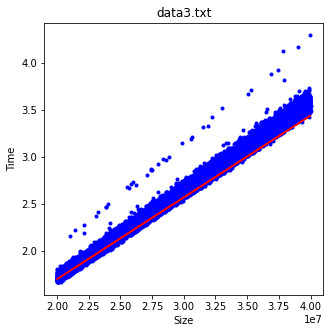

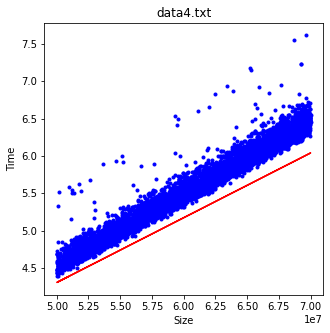

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lR_2 = LinearRegression().fit(x_2, y_2)

# print("===== DATA 2 =====")
y_2_pre = lR_2.predict(x_2)
showResult(x_2, y_2, y_2_pre, 'data2.txt')

# print("===== DATA 3 =====")
y_3_pre = lR_2.predict(x_3)
showResult(x_3, y_3, y_3_pre, 'data3.txt')

# print("===== DATA 4 =====")
y_4_pre = lR_2.predict(x_4)
showResult(x_4, y_4, y_4_pre, 'data4.txt')


In [67]:
print("==DATA_2==")
print("Score:",lR_2.score(x_2, y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2.score(x_3, y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2.score(x_4, y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9915584136404166
Mean squared error:  0.00019039538388105276
Mean absolute error:  0.009515075022088204
==DATA_3==
Score: 0.9656180301457472
Mean squared error:  0.009925040286950439
Mean absolute error:  0.07597229279504716
==DATA_4==
Score: 0.5987714257028354
Mean squared error:  0.13103371796166244
Mean absolute error:  0.33683275373324356


###2.$x*\log{x}$

In [89]:
def newFeature(x):
  return x * np.log(x)# * x #x^2
lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [90]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9916037869471442
Mean squared error:  0.00018937201365366047
Mean absolute error:  0.00947967856292772
==DATA_3==
Score: 0.9829200186284214
Mean squared error:  0.004930476756622277
Mean absolute error:  0.05509914883019722
==DATA_4==
Score: 0.9441157817947988
Mean squared error:  0.018250736253357828
Mean absolute error:  0.10514761204036292


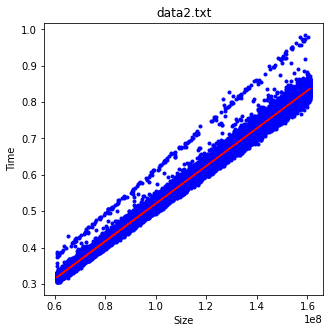

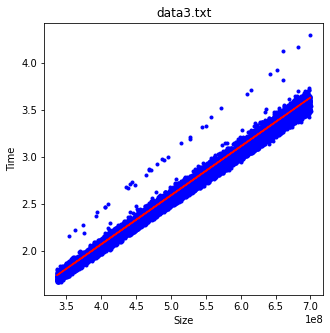

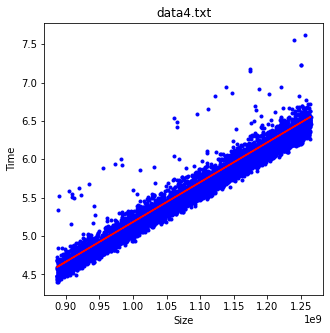

In [92]:
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.txt')
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.txt')
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.txt')


###3.$ \sqrt{x}$

In [93]:
import math
def newFeature(x):
  return np.sqrt(x)
lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [94]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9874975476042452
Mean squared error:  0.0002819860061778477
Mean absolute error:  0.01250166307736461
==DATA_3==
Score: -1.4940700159132714
Mean squared error:  0.719962977436922
Mean absolute error:  0.7933056792205794
==DATA_4==
Score: -20.68916808420098
Mean squared error:  7.0832750098784905
Mean absolute error:  2.6299697817009595


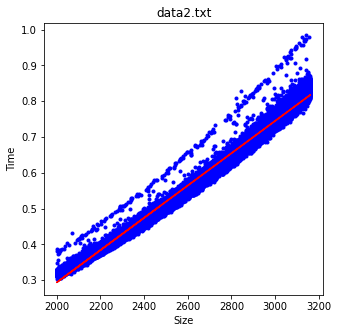

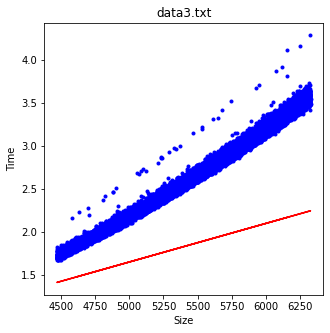

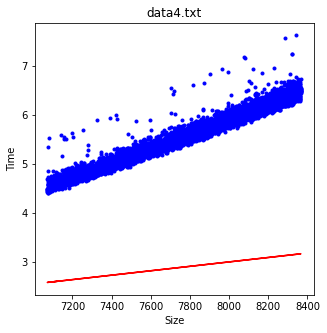

In [95]:
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.txt')
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.txt')
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.txt')


###4 $x^2$

In [78]:
def newFeature(x):
  return x**x
lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [79]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 6.868163879847344e-07
Mean squared error:  0.022554440007384928
Mean absolute error:  0.1297919019714375
==DATA_3==
Score: -14.806629883970734
Mean squared error:  4.562898491981523
Mean absolute error:  2.067420820386205
==DATA_4==
Score: -74.576281566697
Mean squared error:  24.681794363098394
Mean absolute error:  4.935100235312433


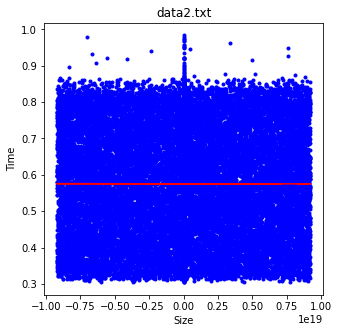

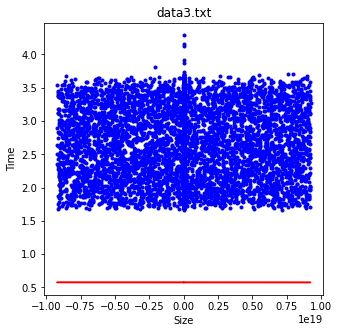

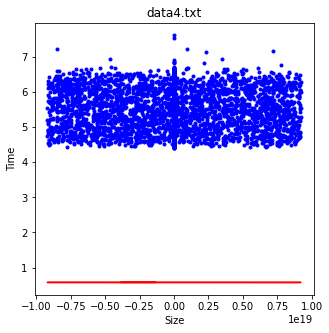

In [81]:
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.txt')
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.txt')
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.txt')


###5.  $\log{x}$

In [82]:
def newFeature(x):
  return np.log(x)
lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [83]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9766519097856063
Mean squared error:  0.0005266034617074393
Mean absolute error:  0.018242483455264098
==DATA_3==
Score: -4.7967612085054325
Mean squared error:  1.673350560544788
Mean absolute error:  1.221711647404486
==DATA_4==
Score: -41.322194476611095
Mean squared error:  13.821633975798507
Mean absolute error:  3.6816173468794227


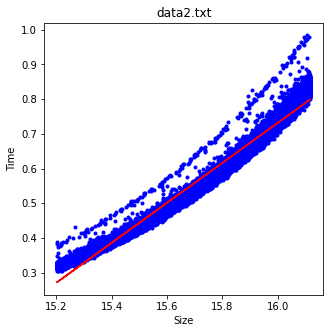

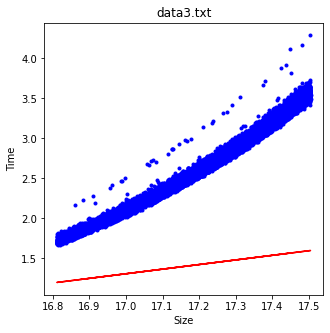

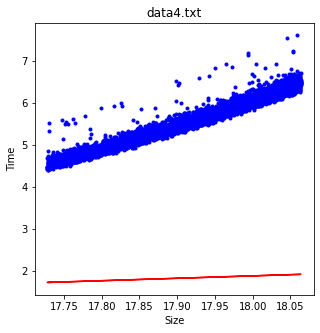

In [84]:
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.txt')
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.txt')
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.txt')

###6. Increase Dimension

In [86]:
def newFeature(X_):
  X = X_
  X = np.hstack((X, np.log2(X_)))
  X = np.hstack((X, X_*np.log2(X_)))
  X = np.hstack((X, X_*X_))
  return X
lR_2_new = LinearRegression().fit(newFeature(x_2), y_2)
y_2_pre = lR_2_new.predict(newFeature(x_2))
y_3_pre = lR_2_new.predict(newFeature(x_3))
y_4_pre = lR_2_new.predict(newFeature(x_4))

In [87]:
print("==DATA_2==")
print("Score:",lR_2_new.score(newFeature(x_2), y_2))
printResult(y_2, y_2_pre)
print("==DATA_3==")
print("Score:",lR_2_new.score(newFeature(x_3), y_3))
printResult(y_3, y_3_pre)
print("==DATA_4==")
print("Score:",lR_2_new.score(newFeature(x_4), y_4))
printResult(y_4, y_4_pre)

==DATA_2==
Score: 0.9916037907070224
Mean squared error:  0.00018937192885165586
Mean absolute error:  0.009479683127897796
==DATA_3==
Score: 0.9794867783143696
Mean squared error:  0.005921549943417335
Mean absolute error:  0.061126918062828356
==DATA_4==
Score: 0.9022556022338357
Mean squared error:  0.03192148483357566
Mean absolute error:  0.15178286789870551


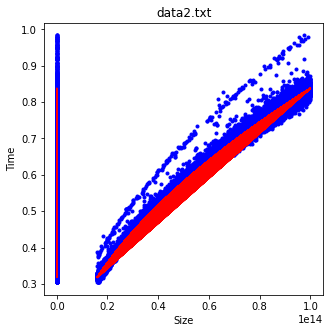

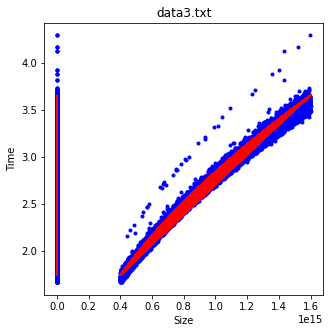

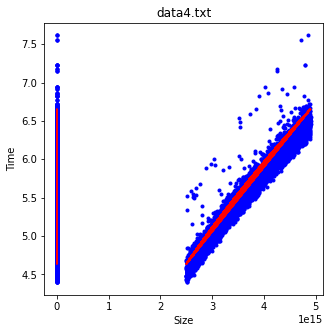

In [88]:
showResult(newFeature(x_2), y_2, y_2_pre, 'data2.txt')
showResult(newFeature(x_3), y_3, y_3_pre, 'data3.txt')
showResult(newFeature(x_4), y_4, y_4_pre, 'data4.txt')

Sau khi kiểm thử trên nhiều feature (x, xlog(x), sqrt(x), x^2, log(x)) nhóm  em nhận thấy với x = x * log(x) thì module dự đoán tốt nhất. Đánh giá module hiệu quả tốt nhất vì kết quả hàm loss trên tập training và tập test đều xấp xỉ nhau và gần bằng 0.